# 模型选择与评估

在机器学习中，模型选择与评估是确保模型性能的重要步骤。本节将详细探讨模型选择、模型验证和模型解释的相关技术和方法。

## 模型选择

模型选择是指在多个候选模型中选择最优模型的过程。常见的模型选择方法包括交叉验证、信息准则（如AIC、BIC）等。模型选择不仅要考虑模型的预测性能，还要考虑模型的复杂度和泛化能力。

### 交叉验证

交叉验证是一种常用的模型选择方法，通过将数据划分为训练集和验证集，反复训练和验证模型，评估其性能。常见的交叉验证方法有k折交叉验证、留一法交叉验证等。

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 设置字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = 'Hiragino Sans GB'
plt.rcParams['axes.unicode_minus'] = False

# 加载数据集
iris = load_iris()
X, y = iris.data, iris.target

# 定义模型
model = LogisticRegression(max_iter=200)

# 定义k折交叉验证
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)

# 输出交叉验证得分
print(f'交叉验证得分: {scores}')
print(f'平均得分: {np.mean(scores):.2f}')

交叉验证得分: [1.         1.         0.86666667 0.93333333 0.83333333]
平均得分: 0.93


### 信息准则

信息准则是用于模型选择的另一种方法，通过计算模型的拟合优度和复杂度，选择最优模型。常见的信息准则包括AIC（Akaike信息准则）和BIC（贝叶斯信息准则）。

In [8]:
from sklearn.linear_model import LassoLarsIC

# 定义LassoLarsIC模型
model = LassoLarsIC(criterion='bic')

# 拟合模型
model.fit(X, y)

# 输出BIC最小的alpha值
print(f'BIC最小的alpha值: {model.alpha_}')

BIC最小的alpha值: 0.0


## 模型验证

模型验证是评估模型在新数据上的性能的重要步骤。常见的模型验证方法包括留出法、交叉验证和自助法（Bootstrap）等。

### 留出法

留出法是将数据集划分为训练集和测试集，用训练集训练模型，用测试集评估模型性能的一种方法。

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 重新定义分类模型
model = LogisticRegression(max_iter=200)

# 训练模型
model.fit(X_train, y_train)

# 预测并计算准确率
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'留出法的准确率: {accuracy:.2f}')


留出法的准确率: 1.00


### 自助法

自助法是一种基于重采样的模型验证方法，通过多次从原始数据集中有放回地抽样，形成多个训练集和测试集，评估模型性能。

In [10]:
from sklearn.utils import resample

# 自助法验证模型
n_iterations = 100
n_size = int(len(X) * 0.7)

scores = list()
for i in range(n_iterations):
    # 重采样数据集
    X_train, y_train = resample(X, y, n_samples=n_size, random_state=i)
    X_test = np.array([x for x in X if x.tolist() not in X_train.tolist()])
    y_test = np.array([y[i] for i in range(len(y)) if X[i].tolist() not in X_train.tolist()])
    
    # 拟合模型
    model.fit(X_train, y_train)
    
    # 预测并计算准确率
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# 输出自助法的平均准确率
print(f'自助法的平均准确率: {np.mean(scores):.2f}')

自助法的平均准确率: 0.96


## 模型解释

模型解释是指理解和解释模型的预测结果和内部机制。模型解释在提高模型透明度、可信度和可解释性方面起着重要作用。常见的模型解释方法包括特征重要性、部分依赖图和SHAP值等。

### 特征重要性

特征重要性是衡量各个特征对模型预测结果贡献大小的一种方法。通过计算特征重要性，我们可以了解哪些特征对模型的预测结果影响最大。

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 训练随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 输出特征重要性
importances = rf.feature_importances_
print('特征重要性:', importances)

特征重要性: [0.10612762 0.02167809 0.43612951 0.43606478]


### 部分依赖图

部分依赖图（PDP）是一种可视化方法，通过展示特定特征对模型预测结果的影响，帮助我们理解模型的预测机制。

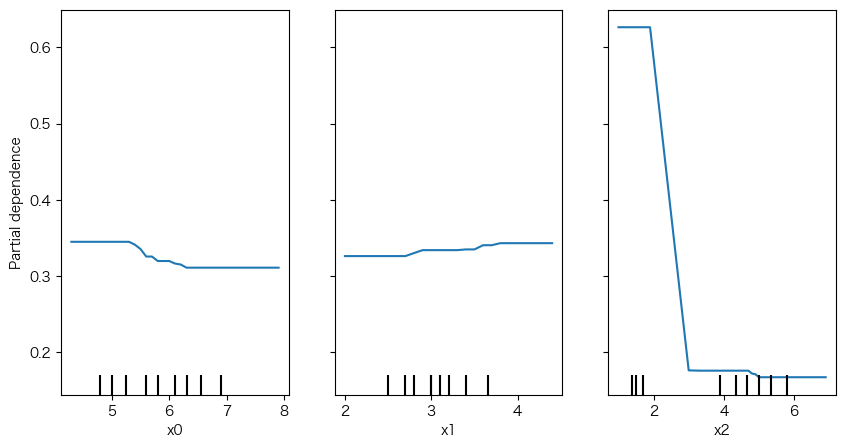

In [13]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 绘制部分依赖图，指定目标类（例如类 0）
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(rf, X, features=[0, 1, 2], target=0, ax=ax)
plt.show()


### SHAP值

SHAP值（SHapley Additive exPlanations）是一种基于博弈论的模型解释方法，通过计算每个特征对预测结果的边际贡献，提供全局和局部的模型解释。

In [ ]:
import shap

# 计算SHAP值
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# 绘制SHAP值
shap.summary_plot(shap_values, X)

通过以上示例，我们了解了模型选择、模型验证和模型解释的基本方法和应用。在实际应用中，选择合适的模型和验证方法，以及理解和解释模型的预测结果，对于构建高性能、可解释的机器学习模型至关重要。